In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

ModuleNotFoundError: No module named 'seaborn'

Import Network Security Dataset

In [2]:
dataset = pd.read_csv("dataset/kddcup.data_10_percent_corrected", header = None)

In [3]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
dataset.shape

(494021, 42)

In [5]:
dataset.describe()

,0,4,5,6,7,8,9,10,11,12,...,31,32,33,34,35,36,37,38,39,40
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Missing values in the data
column_null = [col for col in dataset.columns if dataset[col].isnull().any()]
dataset[column_null].isnull().sum()

#There are no missing data in the dataset

Series([], dtype: float64)

In [7]:
#Create column names
feature_names = pd.read_csv("KDD_Feature_Names.txt", header = None)

name_list = []
length = range(len(feature_names))

for index in length:
    name = feature_names.iloc[index]
    name = str(name).split(": ")[0]
    name = name.split("    ")[1]
    name_list.append(name)

name_list.append("attack type")

name_list

dataset.columns = name_list

In [8]:
#New Column Names
dataset.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack type'],
      dtype='object')

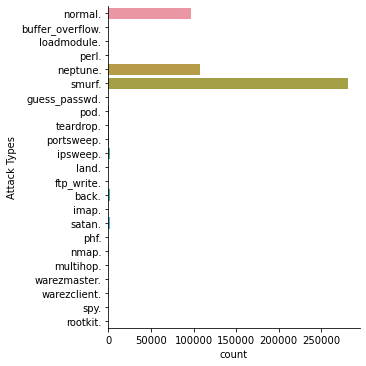

In [9]:
#The frequency of normal and attacks
sns.catplot(data = dataset, y = "attack type", kind = "count")
plt.ylabel("Attack Types")
plt.show()

In [10]:
dataset["attack type"].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: attack type, dtype: int64

In [11]:
#Place all the classes that have less counts than normal into one class "Other"
classes_high_count = ["smurf.", "neptune.", "normal."]
other_classes = list(set(dataset["attack type"]) - set(classes_high_count))
dataset["attack type"] = dataset["attack type"].replace(other_classes, "other")

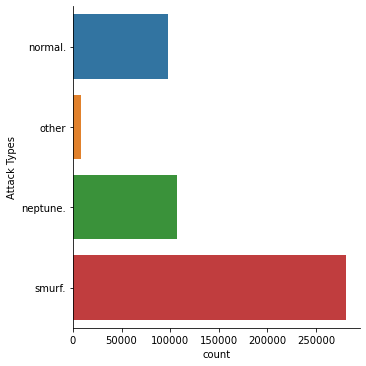

In [12]:
#The frequency of normal and attacks
sns.catplot(data = dataset, y = "attack type", kind = "count")
plt.ylabel("Attack Types")
plt.show()

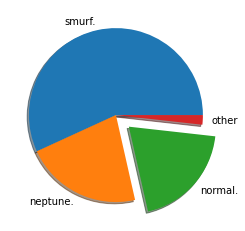

In [13]:
#Pie Chart
x = dataset["attack type"].value_counts()
attack_type_labels = dataset["attack type"].value_counts().index
attack_type_explode = [0, 0, 0.2, 0,]

plt.pie(x, labels = attack_type_labels, explode = attack_type_explode, shadow = True)
plt.show()

In [14]:
dataset["attack type"].value_counts()

smurf.      280790
neptune.    107201
normal.      97278
other         8752
Name: attack type, dtype: int64

[]

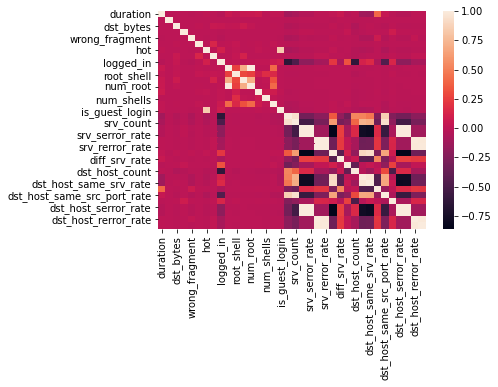

In [15]:
#Correlation Heatmap of the numerical features
new_dataset = dataset.copy()
new_dataset = new_dataset.drop(["num_outbound_cmds", "is_host_login"], axis = 1)

corr_matrix = new_dataset.corr()
sns.heatmap(corr_matrix)
plt.plot()

In [16]:
#Separate Features and Target variable
X = dataset[dataset.columns[0:-1]]
y = dataset["attack type"]

In [17]:
#Get numerical feature names
numerical_variables = X.select_dtypes(exclude=['object'])

#Get categorical feature names
categorical_variables = [col for col in X.columns if X[col].dtype == "object"]
categorical_variables

['protocol_type', 'service', 'flag']

In [18]:
#The number unique values in each categorical feature
object_nunique = list(map(lambda col: X[col].nunique(), categorical_variables))
d = dict(zip(categorical_variables, object_nunique))

#Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('protocol_type', 3), ('flag', 11), ('service', 66)]

In [19]:
#Remove categorical variables that have more than 10 unique values (Cardinality) in train dataset
low_cardinality_cols = [col for col in categorical_variables if X[col].nunique() < 10] #These are the features we will keep

#Features that will be dropped from the dataset
high_cardinality_cols = list(set(categorical_variables)-set(low_cardinality_cols))
#Service feature will be dropped from the dataset

In [20]:
#These are the features we will keep
low_cardinality_cols

['protocol_type']

In [21]:
#Apply OneHotEncoder function
OH_encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
OH_imputed_categorical_variables = pd.DataFrame(OH_encoder.fit_transform(X[low_cardinality_cols]))

#OneHotEncoder function removes index. Give it back
OH_imputed_categorical_variables.index = X.index

In [22]:
#Combine both numerical and categorical features
X = pd.concat([numerical_variables, OH_imputed_categorical_variables], axis=1)
X.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,0,1,2
0,0,181,5450,0,0,0,0,0,1,0,...,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,239,486,0,0,0,0,0,1,0,...,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,235,1337,0,0,0,0,0,1,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,219,1337,0,0,0,0,0,1,0,...,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,217,2032,0,0,0,0,0,1,0,...,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
#Train and split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
#Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)

#Create predictions
y_pred = rf_model.predict(X_test)

In [25]:
#Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred) * 100
accuracy

99.97773392034816

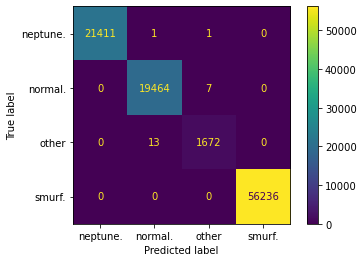

In [26]:
#Confusion Matrix
plotcm = metrics.plot_confusion_matrix(rf_model, X_test, y_test)
plt.show()